# Support Vector Machine
### Luis Chunga

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from nltk.corpus import wordnet as wn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import pos_tag
import pandas as pd
import time


In [2]:
start_time = time.time()
# Add the Data using pandas
Corpus = pd.read_csv("input/batches/email_batch_40.csv",encoding='latin')
Corpus

,email,category
0,this cp has merged into pancanadian energy ser...,0
1,this morning roman blake with calp told robin ...,0
2,kay please forward to max yzaguirre max congra...,0
3,k how s life back in texas i am not sure if i ...,0
4,sent on behalf of laurie pare attached is my m...,0
...,...,...
2853,on line gaming report special online issue inv...,1
2854,account suspension dear paypal user in accorda...,1
2855,small cap stoxs can mean gains for you watch t...,1
2856,roletes e roldanas para empilhadeiras santos j...,1


In [3]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

email                                                               
         count unique                                                top freq
category                                                                     
0         1497   1469  start date hourahead hour no ancillary schedul...   13
1         1360   1355  delivery status notification these recipients ...    2

Text(0.5, 1.0, 'Number of Emails and Spams')

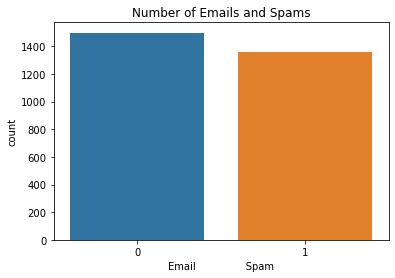

In [4]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('Email                Spam')
plt.title('Number of Emails and Spams')

In [5]:
# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()

In [6]:

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
# By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [7]:
#In this each entry in the corpus will be broken into set of words
Corpus['email']= [word_tokenize(str(entry)) for entry in Corpus['email']]

In [8]:
# IT lematize the corpus and convert the tokenize word to a list of string 
# Removing number

for index,entry in enumerate(Corpus['email']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
   
    # pos_tag function below will provide the 'tag' 
    # if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
        Final_words.append(word_Final)
    
    Corpus.loc[index,'email'] = str(Final_words)


In [9]:
Corpus

,email,category
0,"['this', 'cp', 'have', 'merge', 'into', 'panca...",0
1,"['this', 'morning', 'roman', 'blake', 'with', ...",0
2,"['kay', 'please', 'forward', 'to', 'max', 'yza...",0
3,"['k', 'how', 's', 'life', 'back', 'in', 'texas...",0
4,"['send', 'on', 'behalf', 'of', 'laurie', 'pare...",0
...,...,...
2853,"['on', 'line', 'game', 'report', 'special', 'o...",1
2854,"['account', 'suspension', 'dear', 'paypal', 'u...",1
2855,"['small', 'cap', 'stoxs', 'can', 'mean', 'gain...",1
2856,"['roletes', 'e', 'roldanas', 'para', 'empilhad...",1


##### Splitting 80% for training and 20% for testing

In [10]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Corpus['email'],
                                                                    Corpus['category'],
                                                                    test_size=0.2,
                                                                    random_state=20)

In [11]:
Tfidf_vect = TfidfVectorizer(max_features=1000)


In [12]:
# Vectorize the words by using TF-IDF Vectorizer - 
# This is done to find how important a word in document is in comaprison to the corpus
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(Corpus['email'])

#term frequency–inverse document frequencyTForm
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [13]:
# classifies data 
lr = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=20, verbose=True).fit(X_train_Tfidf, Y_train)
yhat = lr.predict(X_test_Tfidf)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")

[LibSVM]
 -> Accuracy 0.9545454545454546

 -> Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       312
           1       0.94      0.96      0.95       260

    accuracy                           0.95       572
   macro avg       0.95      0.96      0.95       572
weighted avg       0.95      0.95      0.95       572


-> Classification Report
[[296  16]
 [ 10 250]]


In [14]:
print("{:.2f} seconds".format(time.time() - start_time))

182.63 seconds


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

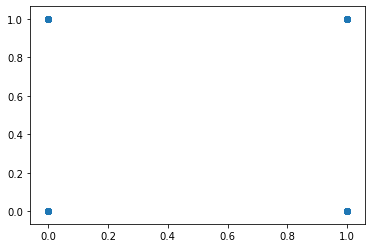

In [15]:


# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train_Tfidf, Y_train, cv=6)
plt.scatter(Y_train, predictions)

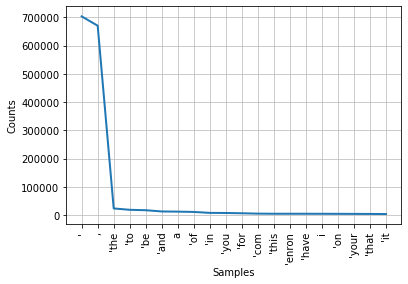

In [16]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokenized_word=[]
fdist = FreqDist()
for i in Corpus.email:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(20,cumulative=False)
plt.show()

# Running non-spam email against all dataset

In [26]:
# CHANGE TO CODE 
from os import listdir
from os import path

start_time = time.time()
input_path = 'input/batches/'
paths = listdir(input_path)
number_of_runs= 49
total = 0
points=[]
total_acc = 0

press1T=0.0; recall1T=0.0; f1_s1T=0.0; supp1T=0.0
press2T=0.0; recall2T=0.0; f1_s2T=0.0; supp2T=0.0
f1_s3T=0.0; supp3T=0.0
press4T=0.0; recall4T=0.0; f1_s4T=0.0; supp4T=0.0
press5T=0.0; recall5T=0.0; f1_s5T=0.0; supp5T=0.0

mat = np.zeros((2, 2))

start_time = time.time()

for i in range(number_of_runs):
    if '.ipynb_checkpoints' in paths[i]:
        continue

    corpus = pd.read_csv(input_path+paths[i],encoding = "latin")
    
    #In this each entry in the corpus will be broken into set of words
    corpus['email']= [word_tokenize(str(entry)) for entry in corpus['email']]
    
    
    for index,entry in enumerate(corpus['email']):
        Final_words = []
        for word, tag in pos_tag(entry):
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)

        corpus.loc[index,'email'] = str(Final_words)
        
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(corpus['email'],
                                                                    corpus['category'],
                                                                    test_size=0.2,
                                                                    random_state=20)
    Tfidf_vect.fit(corpus['email'])

    #term frequency–inverse document frequencyTForm
    X_train_Tfidf = Tfidf_vect.transform(X_train)
    X_test_Tfidf = Tfidf_vect.transform(X_test)
    lr = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=20).fit(X_train_Tfidf, Y_train)
    yhat = lr.predict(X_test_Tfidf)
    
    acc =accuracy_score(Y_test, yhat)
    class_report = classification_report(Y_test, yhat)
    class_report = class_report.split('\n')
    
    press1, recall1, f1_s1, supp1 =  [float(i) for i in class_report[2].split()[1:]]
    press1T+=press1; recall1T+=recall1; f1_s1T+=f1_s1; supp1T+=supp1
    
    press2, recall2, f1_s2, supp2 =  [float(i) for i in class_report[3].split()[1:]]
    press2T+=press2; recall2T+=recall2; f1_s2T+=f1_s2; supp2T+=supp2
    
    f1_s3, supp3 = [float(i) for i in class_report[5].split()[1:]]
    f1_s3T+=f1_s3; supp3T+=supp3
    
    press4, recall4, f1_s4, supp4 = [float(i) for i in class_report[6].split()[2:]]
    press4T+=press4; recall4T+=recall4; f1_s4T+=f1_s4; supp4T+=supp4
    
    
    press5, recall5, f1_s5, supp5 = [float(i) for i in class_report[7].split()[2:]]
    press5T+=press5; recall5T+=recall5; f1_s5T+=f1_s5; supp5T+=supp5
    
    
    con_mat = confusion_matrix(Y_test, yhat)  
    
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            mat[i][j] += con_mat[i][j]
    
    acc = accuracy_score(Y_test, yhat)
    points.append(acc)
    total_acc+=acc
    total +=1 

print("{:.2f} seconds".format(time.time() - start_time))

6489.41 seconds


In [27]:
# the 3 lines below show how to invoke various output    
print("-> Accuracy",total_acc/total)

print("\n"," -> Classification Report\n")

print('{0:13} {1:12s} {2:7s} {3:10s} {4:8s}'.format(' ' , 'precision', 'recall', 'f1-score' , 'support'))

print('{0:9}  {1:6s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}'.format( ' ','0',press1T/total, recall1T/total, f1_s1T/total, supp1T/total))
print('{0:9}  {1:6s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}\n'.format( ' ','1',press2T/total, recall2T/total, f1_s2T/total, supp2T/total))
print('{0:2}  {1:33s} {2:5.2f} {3:9.0f}'.format( ' ','accuracy',f1_s3T/total, supp3T/total))
print('{0:1}  {1:14s} {2:5.2f} {3:9.2f} {4:9.2f} {5:9.0f}'.format( ' ','macro avg',press4T/total, recall4T/total, f1_s4T/total, supp4T/total))
print('{0:17s} {1:5.2f} {2:9.2f} {3:9.2f} {4:9.0f}'.format( 'weighted avg',press5T/total, recall5T/total, f1_s5T/total, supp5T/total))

print("\n","-> Classification Report\n")

print('{0:.0f}  {1:.0f}'.format(mat[0][0], mat[0][1]))
print('{0:.0f}  {1:.0f}'.format(mat[1][0], mat[1][1]))


-> Accuracy 0.9509348375646537

  -> Classification Report

              precision    recall  f1-score   support 
           0       0.96      0.94      0.95       311
           1       0.94      0.96      0.95       261

    accuracy                           0.95       572
   macro avg       0.95      0.95      0.95       572
weighted avg       0.95      0.95      0.95       572

 -> Classification Report

14084  834
513  12022


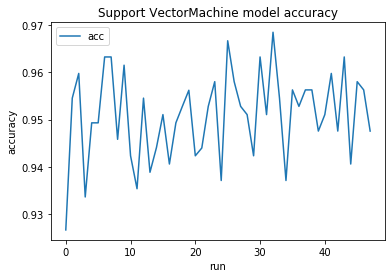

In [29]:
# summarize history for accuracy

plt.plot(points) 
plt.title('Support VectorMachine model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('run')
plt.legend(['acc'], loc='upper left')

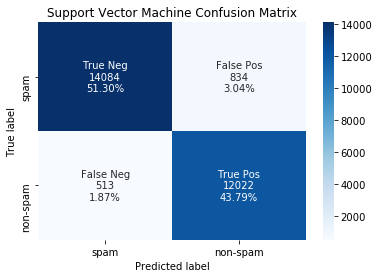

In [32]:
import seaborn as sns
cf_matrix = np.array([[14084,  834], [513,  12022]])
group_names = ['True Neg','False Pos','False Neg','True Pos']
categories = ['spam', 'non-spam']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels,xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Support Vector Machine Confusion Matrix")
plt.show()
